<a href="https://colab.research.google.com/github/TarunShankarU/prodigy/blob/main/Prodigy_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning**

In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv('/content/test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:

null_values_check = df.isnull().sum()

# Print the results
print(null_values_check)




PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


In [ ]:


# Display initial state of missing values
print("Initial missing values in 'Age':", df['Age'].isnull().sum())

# Function to fill missing ages based on median values grouped by 'Pclass' and 'Sex'
def impute_age(df):
    for pclass in df['Pclass'].unique():
        for sex in df['Sex'].unique():
            median_age = df[(df['Pclass'] == pclass) & (df['Sex'] == sex)]['Age'].median()
            df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass) & (df['Sex'] == sex), 'Age'] = median_age
    return df

# Apply the function to the dataframe
df = impute_age(df)

# Display final state of missing values
print("Final missing values in 'Age':", df['Age'].isnull().sum())

Initial missing values in 'Age': 86
Final missing values in 'Age': 0


In [ ]:
# Display initial state of missing values in 'Cabin'
print("Initial missing values in 'Cabin':", df['Cabin'].isnull().sum())

# Sort by 'Ticket' and 'Fare' to group similar entries together
df.sort_values(by=['Ticket', 'Fare'], inplace=True)

# Forward fill missing 'Cabin' values
df['Cabin_ffill'] = df['Cabin'].fillna(method='ffill')

# Backward fill missing 'Cabin' values
df['Cabin_bfill'] = df['Cabin_ffill'].fillna(method='bfill')

# Fill original 'Cabin' column with the forward-backward filled values
df['Cabin'] = df['Cabin_bfill']

# Drop the temporary columns used for filling
df.drop(columns=['Cabin_ffill', 'Cabin_bfill'], inplace=True)

# Display the final state of missing values in 'Cabin'
print("Final missing values in 'Cabin':", df['Cabin'].isnull().sum())

# Display the first few rows of the dataframe to inspect the results
print(df.head())

Initial missing values in 'Cabin': 327
Final missing values in 'Cabin': 0
     PassengerId  Pclass                                   Name   Sex   Age  \
335         1227       1               Maguire, Mr. John Edward  male  30.0   
158         1050       1               Borebank, Mr. John James  male  42.0   
236         1128       1               Warren, Mr. Frank Manley  male  64.0   
191         1083       1                 Salomon, Mr. Abraham L  male  42.0   
266         1158       1  Chisholm, Mr. Roderick Robert Crispin  male  42.0   

     SibSp  Parch  Ticket   Fare Cabin Embarked  
335      0      0  110469  26.00  C106        S  
158      0      0  110489  26.55   D22        S  
236      1      0  110813  75.25   D37        C  
191      0      0  111163  26.00   D37        S  
266      0      0  112051   0.00   D37        S  


In [ ]:


# Check for missing values in the 'Fare' column
missing_fare = df['Fare'].isnull().sum()
print(f"Number of missing values in 'Fare': {missing_fare}")

# Impute missing 'Fare' values with the median
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

# Verify if missing values have been filled
missing_fare_after = df['Fare'].isnull().sum()
print(f"Number of missing values in 'Fare' after imputation: {missing_fare_after}")


Number of missing values in 'Fare': 1
Number of missing values in 'Fare' after imputation: 0


In [ ]:

# Check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicates
if duplicate_rows.shape[0] > 0:
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


# **Distribution Visulaisation**

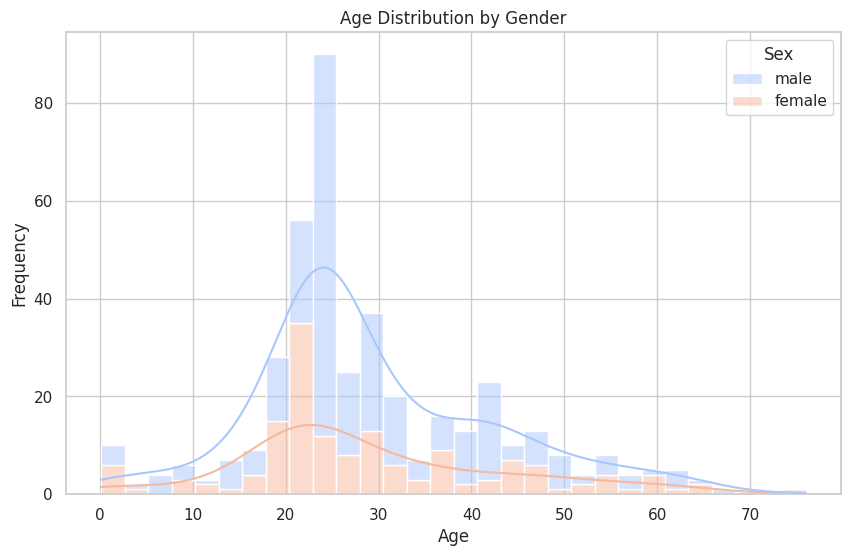

<ipython-input-10-accda3cba9c3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sex', y='Age', palette='coolwarm')


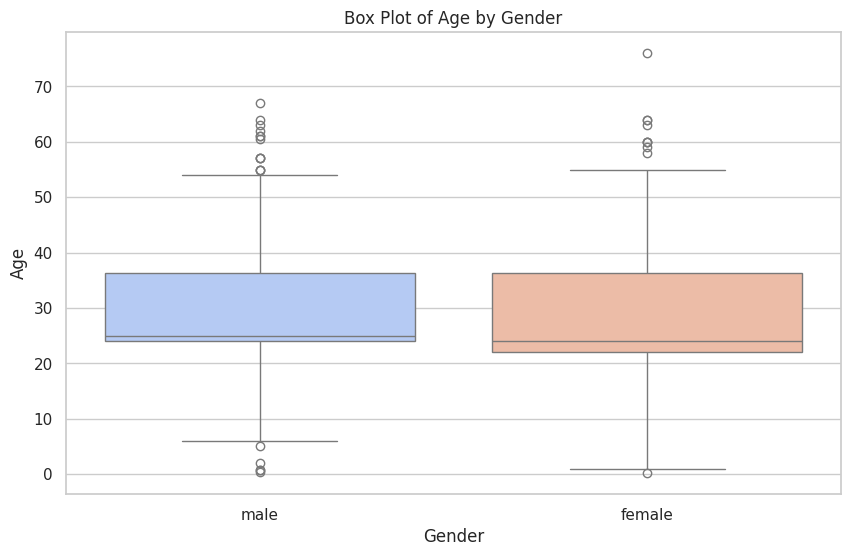

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Drop rows where 'Age' or 'Sex' is missing
df = df.dropna(subset=['Age', 'Sex'])

# Set up the style and color palette
sns.set(style="whitegrid")

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sex', y='Age', palette='coolwarm')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


<ipython-input-16-b3bcb33b23fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='coolwarm')


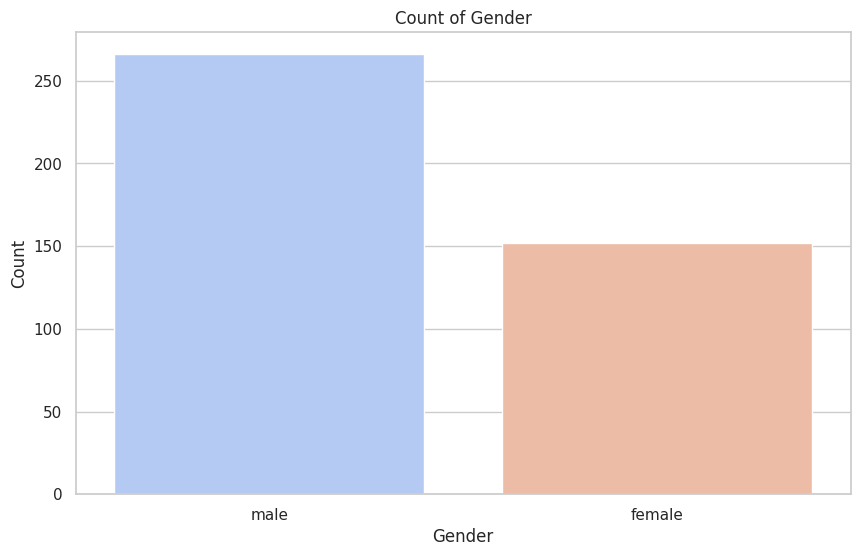

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', palette='coolwarm')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
